In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing raw data
cyto_data = pd.read_csv('data/norm_cytokine_data.csv')
cyto_data.head(3)

,Unnamed: 0,Unnamed: 1,IFN-gamma,Unnamed: 3,IL-12p70,Unnamed: 5,IL-13,Unnamed: 7,IL-1beta,Unnamed: 9,...,IL-21,Unnamed: 29,IL-22,Unnamed: 31,IL-23,Unnamed: 33,IL-27,Unnamed: 35,IL-9,Unnamed: 37
0,NaN,Sample ID,MFI,Result in pg/ml,MFI,Result in pg/ml,MFI,Result in pg/ml,MFI,Result in pg/ml,...,MFI,Result in pg/ml,MFI,Result in pg/ml,MFI,Result in pg/ml,MFI,Result in pg/ml,MFI,Result in pg/ml
1,1.0,3400334878,98,27.22,8.5,<=0,9.5,<=0,11.5,<=0,...,7,<=0,9,<=0,9.5,<=0,10.5,<=0,7,<=0
2,2.0,3400334880,37.5,<=0,8,<=0,9,<=0,9.5,<=0,...,7,<=0,8,<=0,9,<=0,9.5,<=0,8.5,<=0


In [5]:
cyto_data = cyto_data.set_index('Unnamed: 1')

In [6]:
for col in cyto_data.columns:
    #print(col)
    if 'Unnamed' in col:
        #print(col)
        cyto_data = cyto_data.drop(col, axis = 1)

In [7]:
cyto_data = cyto_data.drop('Sample ID') 

In [8]:
#
cyto_data.index.name = 'Sample_ID'
cyto_data.head()

,IFN-gamma,IL-12p70,IL-13,IL-1beta,IL-2,IL-4,IL-5,IL-6,TNF-alpha,GM-CSF,IL-18,IL-10,IL-17A,IL-21,IL-22,IL-23,IL-27,IL-9
Sample_ID,,,,,,,,,,,,,,,,,,
3400334878,98,8.5,9.5,11.5,6.5,8,7.5,8,11,9,124.5,6,5.5,7,9,9.5,10.5,7
3400334880,37.5,8,9,9.5,5,7.5,8,7,9,8,39.5,9.5,5,7,8,9,9.5,8.5
3400334974,33.5,7.5,9,10.5,6,6.5,8,7.5,8,8,26.75,8.5,5,7.5,8,9,9.5,6
3400335283,26,8,9,10.5,6,7,8,7,9,8.5,24,9,5.5,9,8.5,9,10,6
3400335823,40.5,8,9,11,5.5,9,8,7.5,9,9,38.5,8,5,79,9,9,10,6


In [9]:
# the data are input as strings, so we need to change them to int
cyto_data.iloc[1][0]

'37.5'

In [10]:
# convert to float
for col in cyto_data.columns:
    cyto_data[col] = cyto_data[col].apply(float)

In [11]:
cyto_data.describe() #able to calculate median, mean, etc. now

,IFN-gamma,IL-12p70,IL-13,IL-1beta,IL-2,IL-4,IL-5,IL-6,TNF-alpha,GM-CSF,IL-18,IL-10,IL-17A,IL-21,IL-22,IL-23,IL-27,IL-9
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,45.825397,8.726190,10.545635,11.033730,7.083333,8.200397,8.678571,8.136905,10.148810,9.325397,47.884921,10.063492,6.265873,25.878968,12.458333,9.880952,11.311508,8.053571
std,20.209757,1.839138,4.712579,2.318265,4.669154,4.540707,2.467156,1.864834,4.622465,2.533036,23.692966,7.240783,3.978913,164.347342,29.893841,3.025345,4.696987,5.738258
min,16.500000,7.500000,8.500000,8.000000,5.000000,6.000000,7.000000,7.000000,7.500000,8.000000,13.500000,5.750000,4.500000,6.000000,7.500000,8.500000,9.000000,5.000000
25%,32.125000,8.000000,9.000000,10.000000,5.500000,7.000000,8.000000,7.500000,8.500000,8.500000,31.125000,7.500000,5.000000,7.000000,8.000000,9.000000,9.500000,6.000000
50%,40.250000,8.500000,9.500000,10.500000,6.000000,7.000000,8.000000,8.000000,9.000000,8.500000,40.250000,8.500000,5.375000,8.000000,8.500000,9.500000,10.000000,6.500000
75%,55.500000,8.500000,10.000000,11.500000,6.000000,8.000000,8.500000,8.000000,10.000000,9.000000,57.250000,9.500000,6.000000,9.500000,9.000000,10.000000,10.500000,7.500000
max,118.750000,21.250000,56.000000,25.500000,35.250000,50.000000,27.000000,21.500000,45.500000,25.000000,124.500000,64.250000,41.500000,1851.500000,338.250000,42.000000,41.750000,62.750000


In [12]:
type(cyto_data)

pandas.core.frame.DataFrame

In [39]:
# class to test out data generation methods
class dataset:
    def __init__(self, 
                 dataframe: pd.DataFrame
                 ):
        self.data = dataframe
        self.data_summary = self.data.describe()
        
    # Input a list of columns to get summary stats
    def get_summary(self, cols = None): 
        if cols == None:
            return self.data_summary
        elif cols != None:
            return self.data_summary[cols]
    
    
    def get_dataframe(self):
        return self.data
    
    def get_means(self, cols = None)
        return self.get_summary[]
    
    # def bar_plot(self, 
    #              columns,
    #              ):
    #     sns.barplot(data = self.data,
    #                 x = ) 
    
    # def generate_record(self, 
    #                     add_in_place = False,
    #                     n_records = 1
    #                     ):
        
        

In [40]:
dataset_cyto = dataset(cyto_data)
dataset_cyto

In [41]:
dataset_cyto.get_dataframe().head(3)

,IFN-gamma,IL-12p70,IL-13,IL-1beta,IL-2,IL-4,IL-5,IL-6,TNF-alpha,GM-CSF,IL-18,IL-10,IL-17A,IL-21,IL-22,IL-23,IL-27,IL-9
Sample_ID,,,,,,,,,,,,,,,,,,
3400334878,98.0,8.5,9.5,11.5,6.5,8.0,7.5,8.0,11.0,9.0,124.50,6.0,5.5,7.0,9.0,9.5,10.5,7.0
3400334880,37.5,8.0,9.0,9.5,5.0,7.5,8.0,7.0,9.0,8.0,39.50,9.5,5.0,7.0,8.0,9.0,9.5,8.5
3400334974,33.5,7.5,9.0,10.5,6.0,6.5,8.0,7.5,8.0,8.0,26.75,8.5,5.0,7.5,8.0,9.0,9.5,6.0


In [49]:
dataset_cyto.get_summary(cols = ['IFN-gamma', 'IL-2'])

,IFN-gamma,IL-2
count,126.000000,126.000000
mean,45.825397,7.083333
std,20.209757,4.669154
min,16.500000,5.000000
25%,32.125000,5.500000
50%,40.250000,6.000000
75%,55.500000,6.000000
max,118.750000,35.250000


---
Below, I'm checking the distribution of the cytokines to determine what kind of distribution I should use to generate a new record. This is because each cytokine could be either a normal, poisson, or other ditribution.


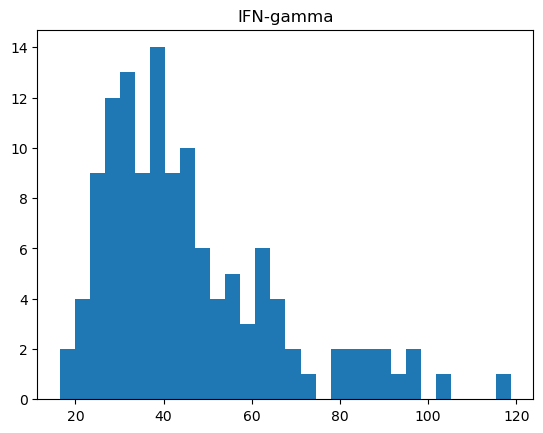

In [44]:
for col in dataset_cyto.get_dataframe().columns:
    plt.hist(x=col, data = cyto_data, bins = 30)
    plt.title(col)
    plt.show()
    break

In [53]:
# get means print(dataset_cyto.get_summary().iloc[1])

IFN-gamma    45.825397
IL-12p70      8.726190
IL-13        10.545635
IL-1beta     11.033730
IL-2          7.083333
IL-4          8.200397
IL-5          8.678571
IL-6          8.136905
TNF-alpha    10.148810
GM-CSF        9.325397
IL-18        47.884921
IL-10        10.063492
IL-17A        6.265873
IL-21        25.878968
IL-22        12.458333
IL-23         9.880952
IL-27        11.311508
IL-9          8.053571
Name: mean, dtype: float64


IFN-gamma    45.825397
IL-12p70      8.726190
IL-13        10.545635
IL-1beta     11.033730
IL-2          7.083333
IL-4          8.200397
IL-5          8.678571
IL-6          8.136905
TNF-alpha    10.148810
GM-CSF        9.325397
IL-18        47.884921
IL-10        10.063492
IL-17A        6.265873
IL-21        25.878968
IL-22        12.458333
IL-23         9.880952
IL-27        11.311508
IL-9          8.053571
Name: mean, dtype: float64


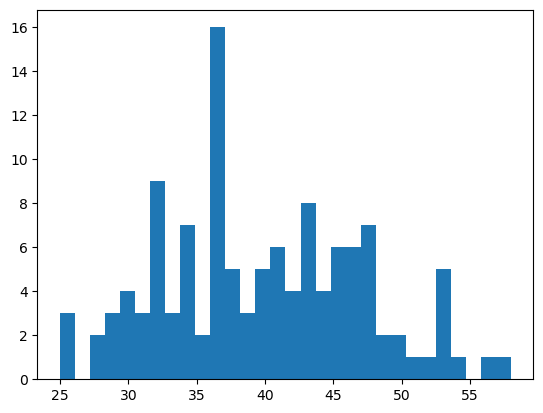

In [52]:
# Almost every graph looks like it follows a Poisson distribution, so I'm going to try using a function from numpy
# in order to get random numbers from a poisson distribution

plt.hist(x=np.random.poisson(lam=40.25, size = 120), bins = 30)
plt.show()

Not sure if poisson is the right choice since most graphs are affected by outliers 

It is possible that the distributions are normal ones with right skew, but with extreme outliers